We will be using the clusterData.csv dataset. This data has been created with 6 clusters, 4 blobs and 2 concentric circles.

**Some References**

* Intro to K-Means: https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1

* K-Means documentation: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

* Intro to DBSCAN: https://medium.com/@elutins/dbscan-what-is-it-when-to-use-it-how-to-use-it-8bd506293818

* DBSCAN documentation: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN

* DBSCAN Demo: https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('clusterData.csv')

print(df.head())

          x         y
0  0.539747 -0.074340
1 -0.748366  0.499009
2  2.602590  0.726548
3  2.156531  1.427136
4  1.402052 -1.964871


# K-Means

For k-means we have to provide the number of clusters in the data. We will loop through a range of clusters and determine the optimal number of clusters. Two techniques for doing this are the sum-of-squared-errors between each data point and the center of its assigned clusters, or the silhouette coefficient which takes into account the distance within the cluster and the distance to other cluster.

For the purposes of this we will use silhouette.

**1. Plot silhouette score vs number of clusters (try 2-10)**

In [3]:
cluster_range = range(2, 11)

silhouette_scores = []

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters = n_clusters, random_state = 42)
    cluster_labels = kmeans.fit_predict(df)
    silhouette_avg = silhouette_score(df, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print("For number of clusters =", n_clusters,
          "The average silhouette score is :", silhouette_avg)

For number of clusters = 2 The average silhouette score is : 0.5691580441521106
For number of clusters = 3 The average silhouette score is : 0.6876076753161773
For number of clusters = 4 The average silhouette score is : 0.6430434265458481
For number of clusters = 5 The average silhouette score is : 0.7102733271941282
For number of clusters = 6 The average silhouette score is : 0.6159695065434645
For number of clusters = 7 The average silhouette score is : 0.6126928752204152
For number of clusters = 8 The average silhouette score is : 0.6640589866489618
For number of clusters = 9 The average silhouette score is : 0.6789766932764262
For number of clusters = 10 The average silhouette score is : 0.6810271026572794


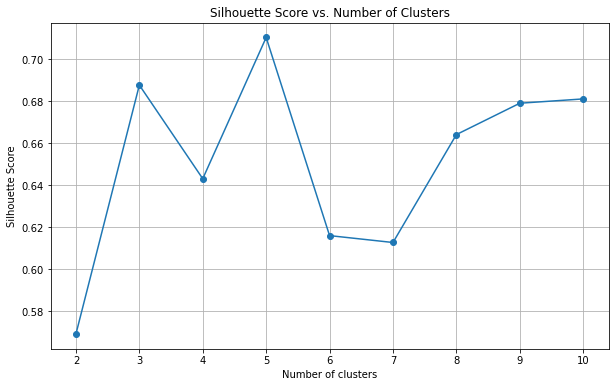

In [4]:
plt.figure(figsize = (10, 6))
plt.plot(cluster_range, silhouette_scores, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.grid(True)
plt.show()

**2. Based on the plot, how many clusters do you recommend?**

In [5]:
optimal_clusters = cluster_range[np.argmax(silhouette_scores)]

print(f'I recommend {optimal_clusters} clusters.')

I recommend 5 clusters.


**3. Plot the data with the optimal number of clusters, using the cluster label as the color code. Describe what you see.**

In [6]:
KMean = KMeans(n_clusters = 5)
KMean.fit(df)
label = KMean.labels_

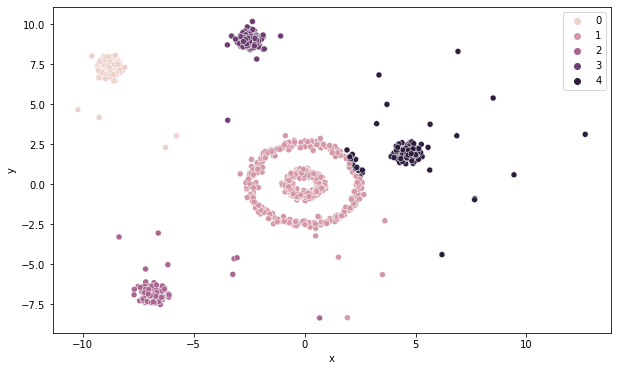

In [7]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x = df['x'], y = df['y'], hue = label)
plt.show()

In [8]:
KMeans_optimal = KMeans(n_clusters = optimal_clusters, random_state = 10)
df['cluster'] = KMeans_optimal.fit_predict(df)

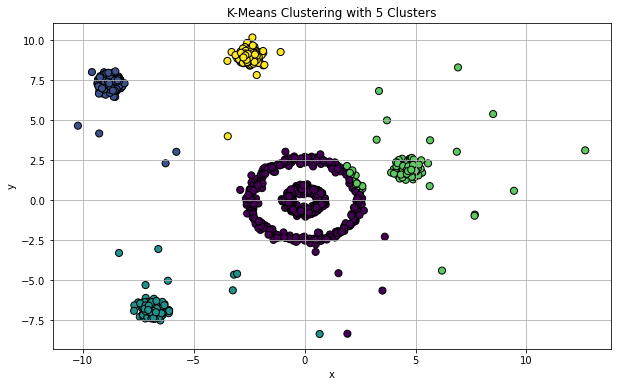

In [9]:
plt.figure(figsize = (10, 6))
plt.scatter(df['x'], df['y'], c = df['cluster'], cmap = 'viridis', marker = 'o', edgecolor = 'k', s = 50)
plt.title(f'K-Means Clustering with {optimal_clusters} Clusters')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

# DBScan

DBSCAN is a density based clustering algorithm. Unlike K-means we do not choose the number of clusters, instead we choose epsilon (the distance between points to consider) and min samples (the number of points to be considered a center). One difference from K-means is that not every point needs to be assigned to a cluster, some points can be considered noise. Additionally, we saw that K-Means has trouble with concentric circles (or clusters that surround another cluster).

**4. Fit the data with DBScan. Choose an appropriate value of eps and min_samples to fit the data, you can use your knowledge of the distributions and standard deviations to make an informed decision. Dont make epsilon too large, the score will increase but you won’t get the concentric circles which we know to be separate.**

In [10]:
X = df
X = StandardScaler().fit_transform(X)
db = DBSCAN(eps = 0.3, min_samples = 10).fit(X)

labels = db.labels_

In [11]:
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

n_noise = list(labels).count(-1)

In [12]:
if n_clusters > 1:
    score = silhouette_score(X, labels)
else:
    score = 'undefined'

**5. How many clusters did you create?**

In [13]:
print(f'Number of clusters: {n_clusters}')

Number of clusters: 6


**6. What is the silhouette score?**

In [14]:
print(f'Silhouette Score: {score}')

Silhouette Score: 0.809437724432097


**7. Plot the data with using the cluster label as the color code. Describe what you see.**

In [15]:
plt.figure(figsize = (10, 6))
df['labels'] = labels
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

<Figure size 720x432 with 0 Axes>

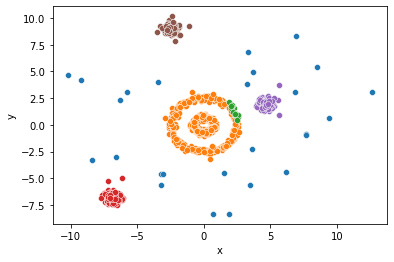

In [16]:
for index in range(-1, 5):
    x = df.loc[df['labels'] == index]['x']
    y = df.loc[df['labels'] == index]['y']
    sns.scatterplot(x='x', y='y', data=df.loc[df['labels'] == index])

plt.show()